# PROJETO ICD - INTRODUÇÃO À CIÊNCIA DE DADOS - UFPB 

## Análise de dados dos 10 carros nacionais mais vendidos de 2015.

### Grupo
- ULLYSSES DA NOBREGA ROSENDO
- JONATHAN MARQUES DE OLIVEIRA SILVA

### Datasets
- Ações Fiat no período de janeiro 2015 - abril 2021
- Ações Ford no período de janeiro 2015 - abril 2021
- Ações GM - Chevrolet no período de janeiro 2015 - abril 2021
- Ações Hyundai no período de janeiro 2015 - abril 2021
- Ações VW - VolksWagen no período de janeiro 2015 - abril 2021
- Preço Médio de Veículos - Tabela FIPE - Janeiro 2015 - Abril 2021

In [169]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white", context="talk")


df1 = pd.read_excel("Fiat.xlsx")
df2 = pd.read_excel("Ford.xlsx")
df3 = pd.read_excel("GM - Chevrolet.xlsx")
df4 = pd.read_excel("Hyundai.xlsx")
df5 = pd.read_excel("Renault.xlsx")
df6 = pd.read_excel("VW - VolksWagen.xlsx")

df_investing = pd.concat([df1,df2,df3,df4,df5,df6])[['Data','Marca','Último']]
df_investing.columns = ['Data','Marca','Valor']
df_investing = df_investing.query("Data != 'Mai 21'")
df_fipe = pd.read_excel('Dados Veículo FIPE.xlsx')

In [136]:
df_investing

,Data,Marca,Valor
1,Abr 21,Fiat,13.824
2,Mar 21,Fiat,15.084
3,Fev 21,Fiat,13.434
4,Jan 21,Fiat,12.530
5,Dez 20,Fiat,14.660
...,...,...,...
72,Mai 15,VW - VolksWagen,221.000
73,Abr 15,VW - VolksWagen,231.450
74,Mar 15,VW - VolksWagen,247.850
75,Fev 15,VW - VolksWagen,225.500


In [135]:
df_fipe

,Marca,Modelo,AnoModelo,Combustivel,MesReferencia,Valor,Data,Ano,Mes
0,GM - Chevrolet,ONIX HATCH LT 1.0 8V FlexPower 5p Mec.,2015,Gasolina,2021-04,36.407,Abr 21,2021,4
1,GM - Chevrolet,ONIX HATCH LT 1.0 8V FlexPower 5p Mec.,2015,Gasolina,2021-03,34.987,Mar 21,2021,3
2,GM - Chevrolet,ONIX HATCH LT 1.0 8V FlexPower 5p Mec.,2015,Gasolina,2021-02,34.414,Fev 21,2021,2
3,GM - Chevrolet,ONIX HATCH LT 1.0 8V FlexPower 5p Mec.,2015,Gasolina,2021-01,34.136,Jan 21,2021,1
4,GM - Chevrolet,ONIX HATCH LT 1.0 8V FlexPower 5p Mec.,2015,Gasolina,2020-12,33.721,Dez 20,2020,12
...,...,...,...,...,...,...,...,...,...
745,GM - Chevrolet,PRISMA Sed. LT 1.0 8V FlexPower 4p,2015,Gasolina,2015-06,37.622,Jun 15,2015,6
746,GM - Chevrolet,PRISMA Sed. LT 1.0 8V FlexPower 4p,2015,Gasolina,2015-05,37.669,Mai 15,2015,5
747,GM - Chevrolet,PRISMA Sed. LT 1.0 8V FlexPower 4p,2015,Gasolina,2015-04,37.245,Abr 15,2015,4
748,GM - Chevrolet,PRISMA Sed. LT 1.0 8V FlexPower 4p,2015,Gasolina,2015-03,36.824,Mar 15,2015,3


## Projeto #2 - Exploração inicial   

### Medidas de Centralidade e Dispersão

#### Ações das Montadoras

In [122]:
df_investing.groupby('Marca').describe()

Valor                                                   \
                count        mean        std    min       25%      50%   
Marca                                                                    
Fiat             76.0   10.435539   3.258020   4.94    7.9350   10.505   
Ford             76.0   10.900263   2.575529   4.83    9.1675   11.085   
GM - Chevrolet   76.0   35.800526   6.419416  20.78   31.7925   35.975   
Hyundai          76.0  145.519737  27.815022  88.70  129.2500  142.000   
Renault          76.0   65.212500  23.533593  17.71   49.3450   74.145   
VW - VolksWagen  76.0  150.777237  31.670530  97.75  132.2625  144.725   

                                     
                       75%      max  
Marca                                
Fiat              13.16075   17.569  
Ford              12.38250   16.160  
GM - Chevrolet    38.09500   57.460  
Hyundai          160.12500  237.000  
Renault           84.17500   98.500  
VW - VolksWagen  161.63000  247.850

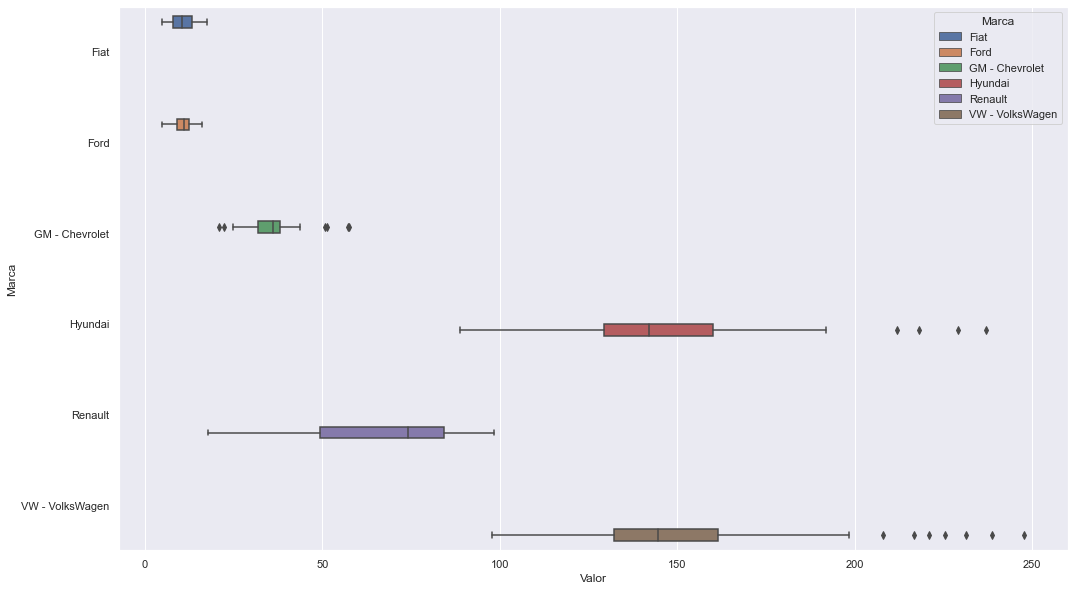

In [172]:
sns.set(rc={'figure.figsize':(17,10)})
sns.boxplot(data=df_investing,  y="Marca", hue="Marca", x='Valor')


#### Preço Médio dos Veículos

In [132]:
df_fipe.groupby("Modelo")['Valor'].describe()

,count,mean,std,min,25%,50%,75%,max
Modelo,,,,,,,,
Fox Comfortline 1.0 Flex 8V 5p,75.0,35.316880,2.059340,31.150,33.4595,36.162,37.0075,38.352
Gol Trendline 1.0 T.Flex 8V 5p,75.0,29.631013,1.277067,27.550,28.8405,29.382,30.1770,32.495
HB20 Comf./C.Plus/C.Style 1.0 Flex 12V,75.0,35.657400,0.925438,34.105,34.9745,35.555,36.2650,38.131
Ka 1.0 SEL TiVCT Flex 5p,75.0,34.909707,1.300021,32.887,33.9080,34.788,35.5005,37.852
ONIX HATCH LT 1.0 8V FlexPower 5p Mec.,75.0,34.456587,0.919049,32.472,33.9895,34.541,34.9845,36.407
PRISMA Sed. LT 1.0 8V FlexPower 4p,75.0,36.567227,1.024561,34.222,36.0075,36.807,37.3490,38.696
Palio ATTRACTIVE 1.0 EVO Fire Flex 8v 5p,75.0,30.704307,1.046399,28.472,30.3160,30.802,31.3100,33.120
SANDERO Expression Hi-Power 1.0 16V 5p,75.0,30.378333,1.863320,27.615,28.7960,30.263,31.1100,34.565
Strada Working 1.4 mpi Fire Flex 8V CS,75.0,33.751733,1.053647,31.602,33.0795,33.604,34.5045,36.607


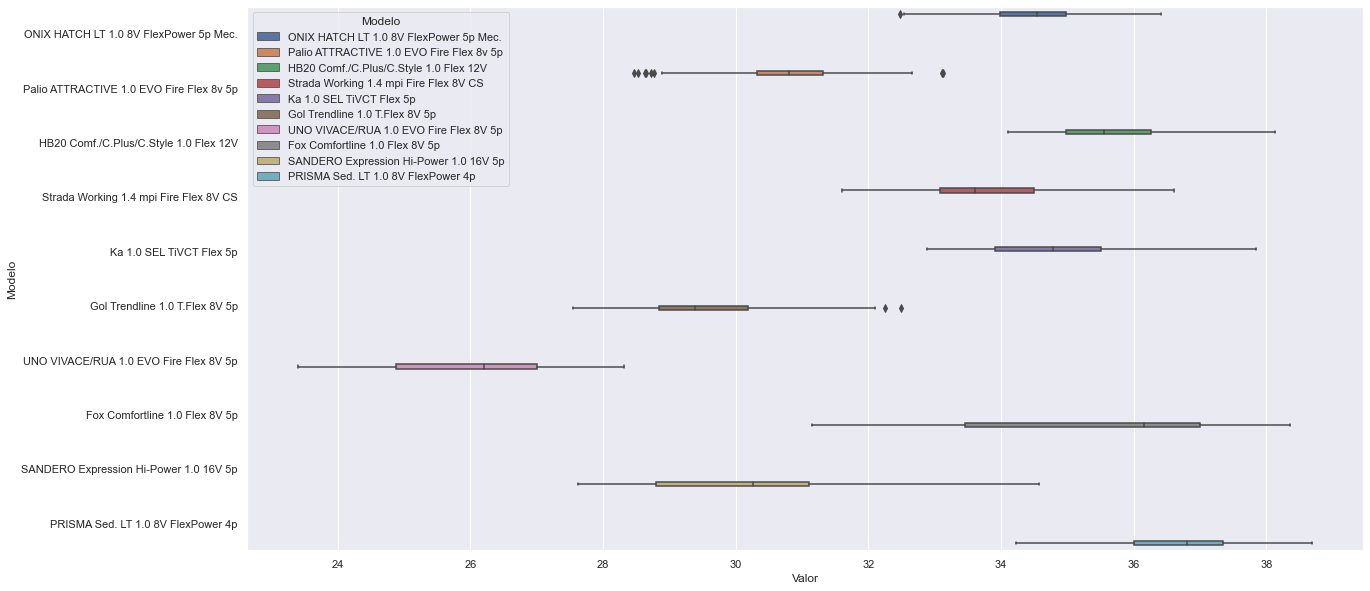

In [173]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=df_fipe,  y="Modelo", hue="Modelo", x='Valor')

## Projeto #3 - Visualização de dados   

In [178]:
data = df_fipe.groupby('Marca')['Marca'].count()/75
data

Marca
Fiat               3.0
Ford               1.0
GM - Chevrolet     2.0
Hyundai            1.0
Renault            1.0
VW - VolksWagen    2.0
Name: Marca, dtype: float64

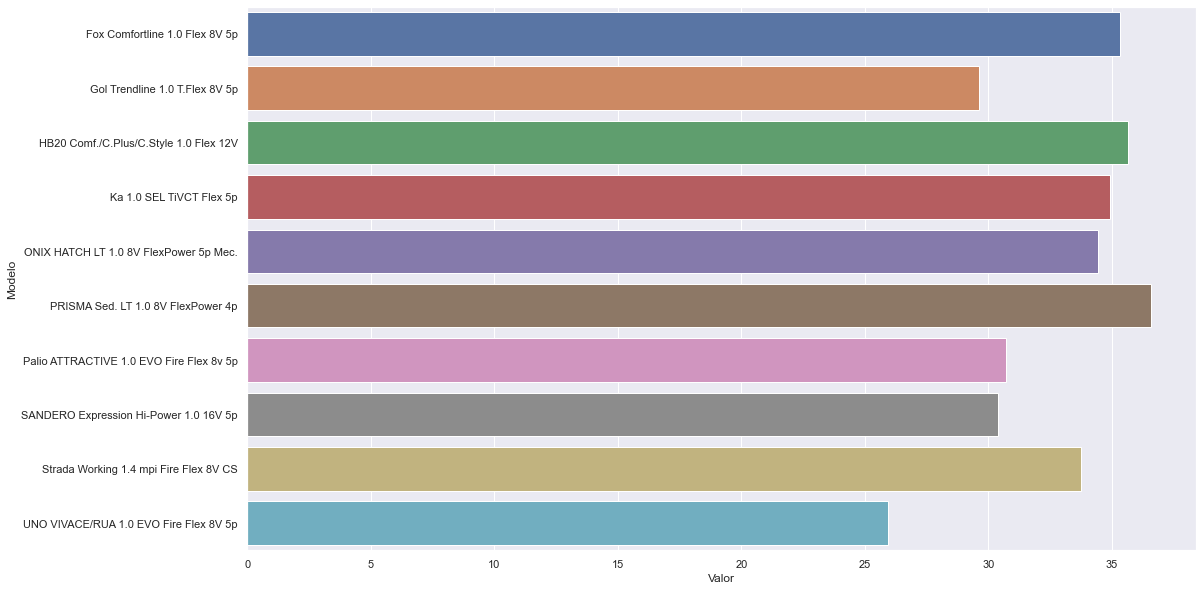

In [175]:

data = df_fipe.groupby('Modelo')['Valor'].mean()
data = pd.DataFrame(data).reset_index()
data
sns.set(rc={'figure.figsize':(17,10)})
sns.barplot(data=data, x='Valor',y='Modelo')

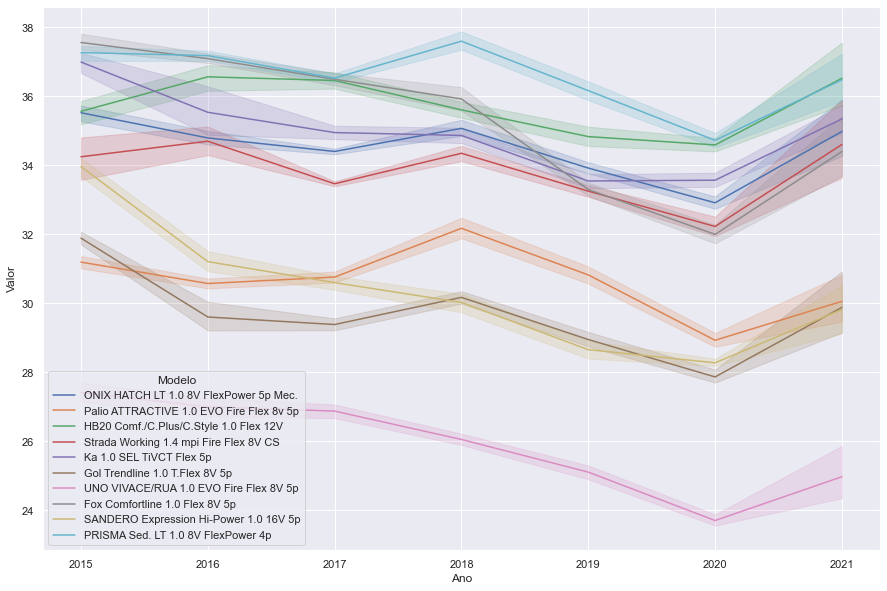

In [162]:
sns.lineplot(data=df_fipe, x='Ano', y='Valor', hue='Modelo')